In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()

In [221]:
df = pd.read_csv("LBJPO.csv")
df.head()

,Rk,G,Date,Series,Tm,Opp,G#,Outcome,GS,MP,...,TOV%,USG%,ORtg,DRtg,GmSc.1,Home/Away,Away,Home,Win/Loss,Point Diff
0,1.0,1.0,2006-04-22,EC1,CLE,WAS,1.0,W (+11),1.0,48:00,...,11.2,33.6,115.0,105.0,23.3,H,0.0,1.0,W,11.0
1,2.0,2.0,2006-04-25,EC1,CLE,WAS,2.0,L (-5),1.0,43:28,...,24.0,41.1,72.0,95.0,6.7,H,0.0,1.0,L,-5.0
2,3.0,3.0,2006-04-28,EC1,CLE,WAS,3.0,W (+1),1.0,47:37,...,11.1,33.3,119.0,104.0,27.4,@,1.0,0.0,W,1.0
3,4.0,4.0,2006-04-30,EC1,CLE,WAS,4.0,L (-10),1.0,45:20,...,21.2,34.7,121.0,122.0,23.0,@,1.0,0.0,L,-10.0
4,5.0,5.0,2006-05-03,EC1,CLE,WAS,5.0,W (+1),1.0,46:07,...,11.5,35.9,148.0,126.0,38.4,H,0.0,1.0,W,1.0


In [222]:
#LeBron's playoff games can be split into 4 stints: 1st CLE stint, MIA, 2nd CLE stint and LAL
df["Stint"] = "CLE(06-10)"
for i in range(0,len(df)):
    if df["Tm"].iloc[i] == "MIA":
        df["Stint"].iloc[i] = "MIA"
    elif "2015" in df["Date"].iloc[i] or "2016" in df["Date"].iloc[i] or "2017" in df["Date"].iloc[i] or "2018" in df["Date"].iloc[i]:
        df["Stint"].iloc[i] = "CLE(15-18)"
    elif df["Tm"].iloc[i] == "LAL":
        df["Stint"].iloc[i] = "LAL"

c:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Overall Win Percentage: 0.65%
1st Cleveland Stint Win Percentage: 0.59%
Miami Win Percentage: 0.68%
2nd Cleveland Stint Win Percentage: 0.68%
Lakers Win Percentage: 0.67%


c:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


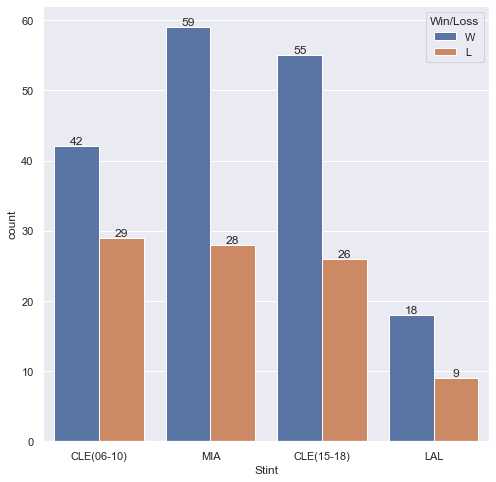

In [223]:
#Win-Loss Record (Split into: 1st CLE stint, MIA, 2nd CLE stint and LAL)
winpct = df["Win/Loss"].value_counts()["W"] / df.shape[0]
winpct_cle1 = len(df.loc[(df["Win/Loss"] == "W") & (df["Stint"] == "CLE(06-10)")]) / len(df.loc[df["Stint"] == "CLE(06-10)"])
winpct_mia = len(df.loc[(df["Win/Loss"] == "W") & (df["Stint"] == "MIA")]) / len(df.loc[df["Stint"] == "MIA"])
winpct_cle2 = len(df.loc[(df["Win/Loss"] == "W") & (df["Stint"] == "CLE(15-18)")]) / len(df.loc[df["Stint"] == "CLE(15-18)"])
winpct_lal = len(df.loc[(df["Win/Loss"] == "W") & (df["Stint"] == "LAL")]) / len(df.loc[df["Stint"] == "LAL"])
print("Overall Win Percentage: {:.2f}%".format(winpct))
print("1st Cleveland Stint Win Percentage: {:.2f}%".format(winpct_cle1))
print("Miami Win Percentage: {:.2f}%".format(winpct_mia))
print("2nd Cleveland Stint Win Percentage: {:.2f}%".format(winpct_cle2))
print("Lakers Win Percentage: {:.2f}%".format(winpct_lal))

plt.figure(figsize=(8,8))
ax = sb.countplot("Stint", data=df, hue="Win/Loss")
for container in ax.containers:
    ax.bar_label(container)

Win rates were similar for all stints except for his first 5 years in cleveland from 2006-2010 where the win rate was considerably lower compared to the rest of his playoff career.

Overall
count    266.000000
mean       3.894737
std       14.157211
min      -36.000000
25%       -5.000000
50%        5.000000
75%       12.000000
max       44.000000
Name: Point Diff, dtype: float64
CLE(06-10)
count    71.000000
mean      2.295775
std      13.248606
min     -36.000000
25%      -5.000000
50%       2.000000
75%      10.500000
max      30.000000
Name: Point Diff, dtype: float64
MIA
count    87.000000
mean      4.620690
std      13.175242
min     -36.000000
25%      -3.500000
50%       6.000000
75%      12.000000
max      37.000000
Name: Point Diff, dtype: float64
CLE(15-18)
count    81.000000
mean      4.518519
std      16.332568
min     -34.000000
25%      -7.000000
50%       5.000000
75%      13.000000
max      44.000000
Name: Point Diff, dtype: float64
LAL
count    27.000000
mean      3.888889
std      12.858201
min     -30.000000
25%      -7.500000
50%       8.000000
75%      11.000000
max      23.000000
Name: Point Diff, dtype: float64


Text(0.5, 0, 'LAL')

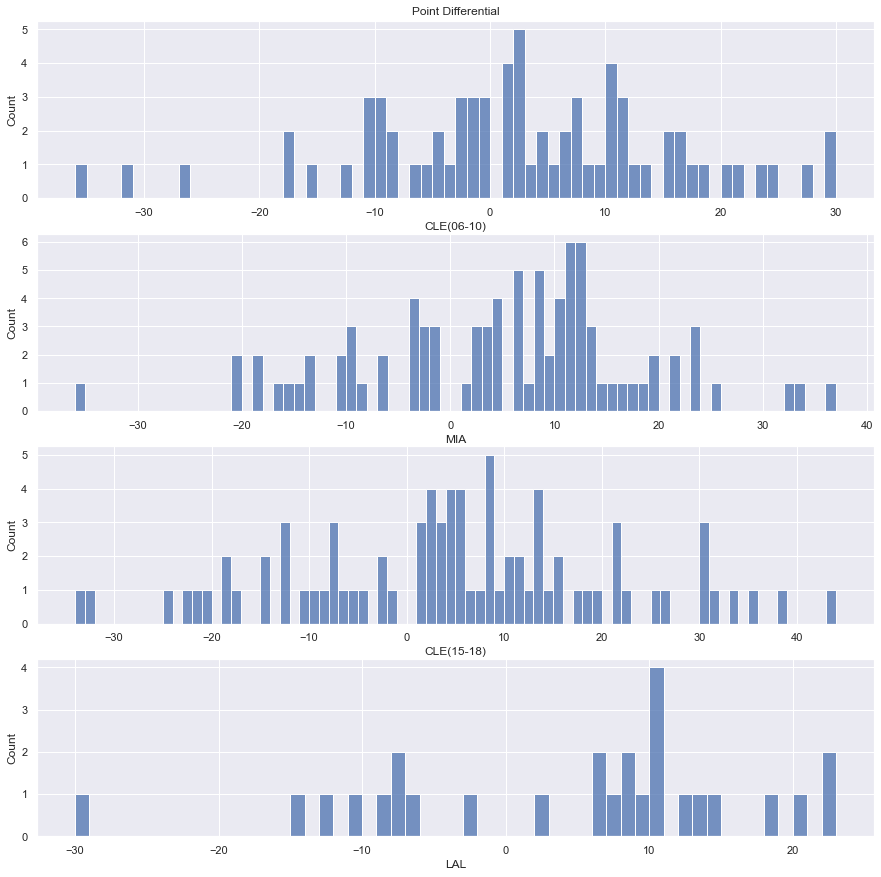

<Figure size 1440x864 with 0 Axes>

In [224]:
#Point Differential
print("Overall")
print(df["Point Diff"].describe())
print("CLE(06-10)")
print(df.loc[df["Stint"] == "CLE(06-10)"]["Point Diff"].describe())
print("MIA")
print(df.loc[df["Stint"] == "MIA"]["Point Diff"].describe())
print("CLE(15-18)")
print(df.loc[df["Stint"] == "CLE(15-18)"]["Point Diff"].describe())
print("LAL")
print(df.loc[df["Stint"] == "LAL"]["Point Diff"].describe())

fig,ax = plt.subplots(4,1, figsize=(15,15))
plt.figure(figsize=(20, 12))
ax[0].set_title("Point Differential")
sb.histplot(x = "Point Diff", data=df.loc[df["Stint"] == "CLE(06-10)"], binwidth=1, ax=ax[0])
ax[0].set_xlabel("CLE(06-10)")
sb.histplot(x = "Point Diff", data=df.loc[df["Stint"] == "MIA"], binwidth=1, ax=ax[1])
ax[1].set_xlabel("MIA")
sb.histplot(x = "Point Diff", data=df.loc[df["Stint"] == "CLE(15-18)"], binwidth=1, ax=ax[2])
ax[2].set_xlabel("CLE(15-18)")
sb.histplot(x = "Point Diff", data=df.loc[df["Stint"] == "LAL"], binwidth=1, ax=ax[3])
ax[3].set_xlabel("LAL")

<AxesSubplot:xlabel='Point Diff', ylabel='Stint'>

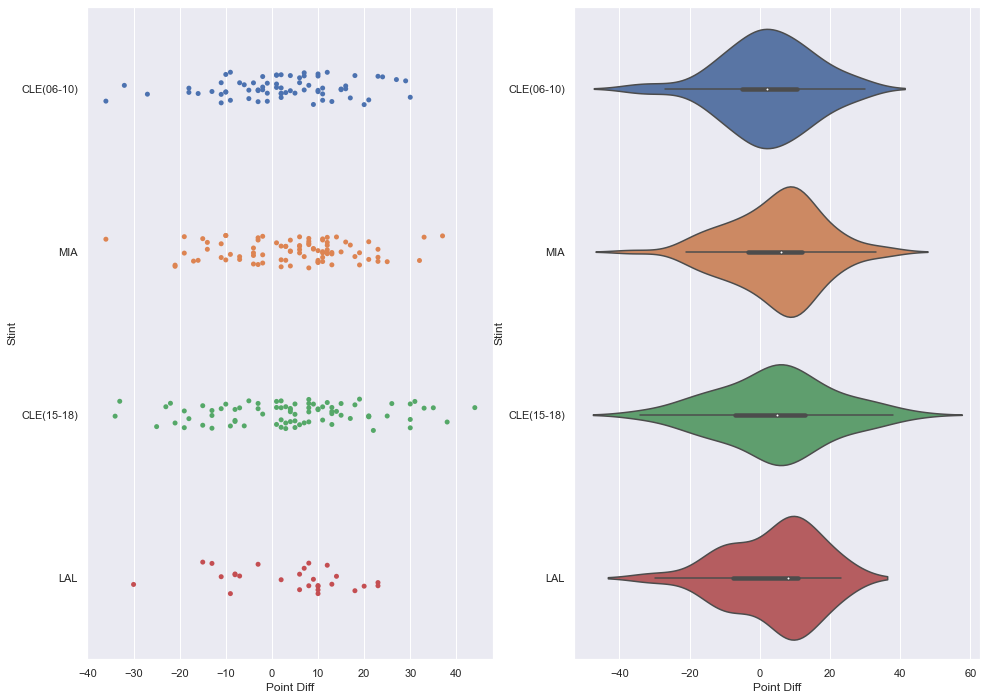

In [225]:
fig,ax = plt.subplots(1, 2, figsize=(16,12))
sb.stripplot(x="Point Diff",y="Stint", data=df, ax=ax[0])
sb.violinplot(x="Point Diff", y="Stint", data=df, ax=ax[1])

In [226]:
#Function to compare stat across different stints of his career
def bystint(stat):
    print("Overall")
    print(df[stat].describe())
    print("CLE(06-10)")
    print(df.loc[df["Stint"] == "CLE(06-10)"][stat].describe())
    print("MIA")
    print(df.loc[df["Stint"] == "MIA"][stat].describe())
    print("CLE(15-18)")
    print(df.loc[df["Stint"] == "CLE(15-18)"][stat].describe())
    print("LAL")
    print(df.loc[df["Stint"] == "LAL"][stat].describe())

    fig,ax = plt.subplots(1, 2, figsize=(16,12))
    sb.stripplot(x=stat,y="Stint", data=df, ax=ax[0])
    sb.violinplot(x=stat, y="Stint", data=df, ax=ax[1])

In [227]:
#Function to compare stat in wins and losses
def bywl(stat):
    print("Wins")
    print(df.loc[df["Win/Loss"] == "W"][stat].describe())
    print("Losses")
    print(df.loc[df["Win/Loss"] == "L"][stat].describe())

    fig,ax = plt.subplots(1, 2, figsize=(16,12))
    sb.stripplot(x=stat,y="Win/Loss", data=df, ax=ax[0])
    sb.violinplot(x=stat, y="Win/Loss", data=df, ax=ax[1])

Overall
count    266.000000
mean      28.687970
std        8.113604
min        7.000000
25%       23.000000
50%       28.000000
75%       33.750000
max       51.000000
Name: PTS, dtype: float64
CLE(06-10)
count    71.000000
mean     29.309859
std       8.764525
min      10.000000
25%      22.500000
50%      29.000000
75%      35.000000
max      49.000000
Name: PTS, dtype: float64
MIA
count    87.000000
mean     26.873563
std       7.050985
min       7.000000
25%      22.000000
50%      28.000000
75%      31.500000
max      49.000000
Name: PTS, dtype: float64
CLE(15-18)
count    81.000000
mean     30.765432
std       8.372980
min      11.000000
25%      24.000000
50%      30.000000
75%      38.000000
max      51.000000
Name: PTS, dtype: float64
LAL
count    27.000000
mean     26.666667
std       7.364154
min      10.000000
25%      23.000000
50%      26.000000
75%      30.000000
max      40.000000
Name: PTS, dtype: float64


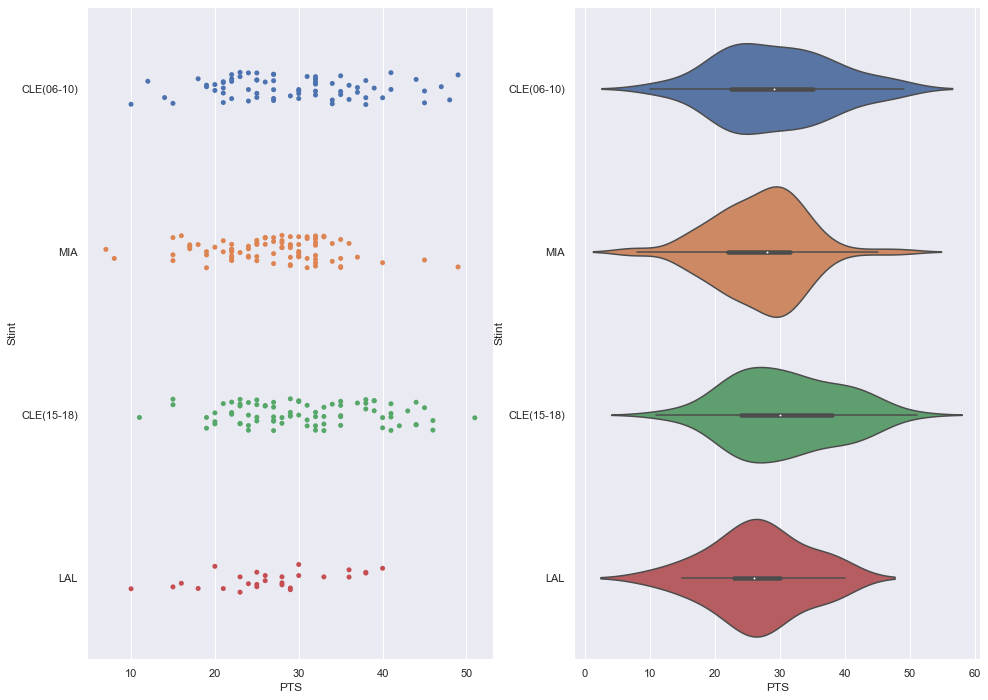

In [228]:
#Points
bystint("PTS")

LeBron's average scoring output was the highest in cleveland from 2015-18 and lowest on the lakers. His scoring was the most consistent on the heat and lakers with the narrowest IQRs and sd in points scored per game.

Wins
count    174.000000
mean      29.913793
std        7.391491
min       10.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       49.000000
Name: PTS, dtype: float64
Losses
count    92.000000
mean     26.369565
std       8.918086
min       7.000000
25%      21.000000
50%      25.000000
75%      30.000000
max      51.000000
Name: PTS, dtype: float64


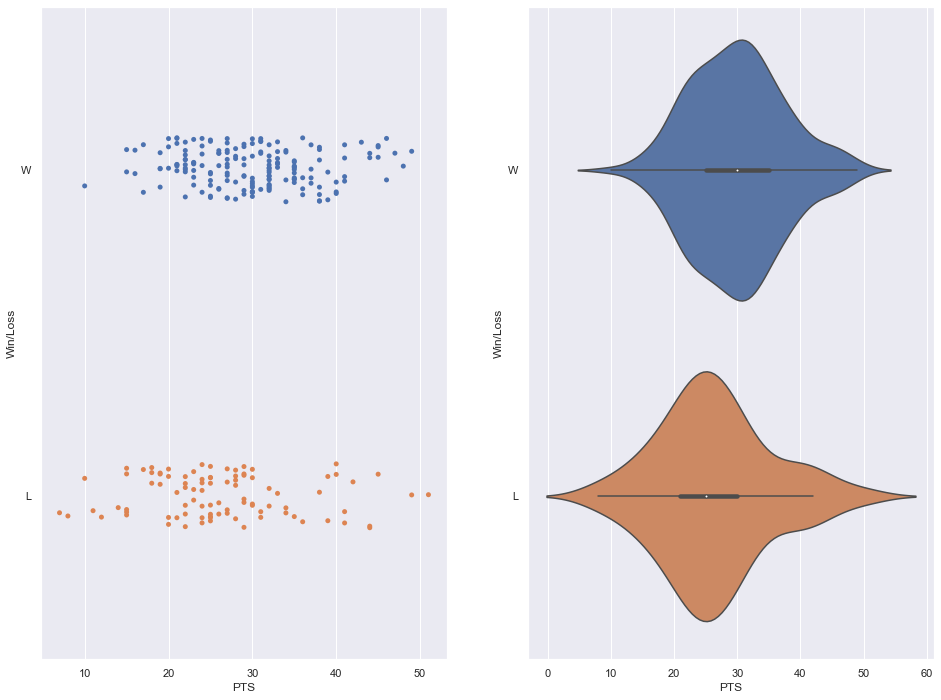

In [229]:
bywl("PTS")

As expected, his teams win more often when he scores more points.

Overall
count    266.000000
mean       0.585286
std        0.112514
min        0.268000
25%        0.519250
50%        0.586500
75%        0.653500
max        0.966000
Name: TS%, dtype: float64
CLE(06-10)
count    71.000000
mean      0.557127
std       0.110849
min       0.268000
25%       0.489000
50%       0.556000
75%       0.614000
max       0.864000
Name: TS%, dtype: float64
MIA
count    87.000000
mean      0.594448
std       0.103535
min       0.309000
25%       0.537500
50%       0.588000
75%       0.664000
max       0.852000
Name: TS%, dtype: float64
CLE(15-18)
count    81.000000
mean      0.585889
std       0.115428
min       0.314000
25%       0.518000
50%       0.588000
75%       0.658000
max       0.839000
Name: TS%, dtype: float64
LAL
count    27.000000
mean      0.628000
std       0.123095
min       0.421000
25%       0.556500
50%       0.628000
75%       0.657500
max       0.966000
Name: TS%, dtype: float64


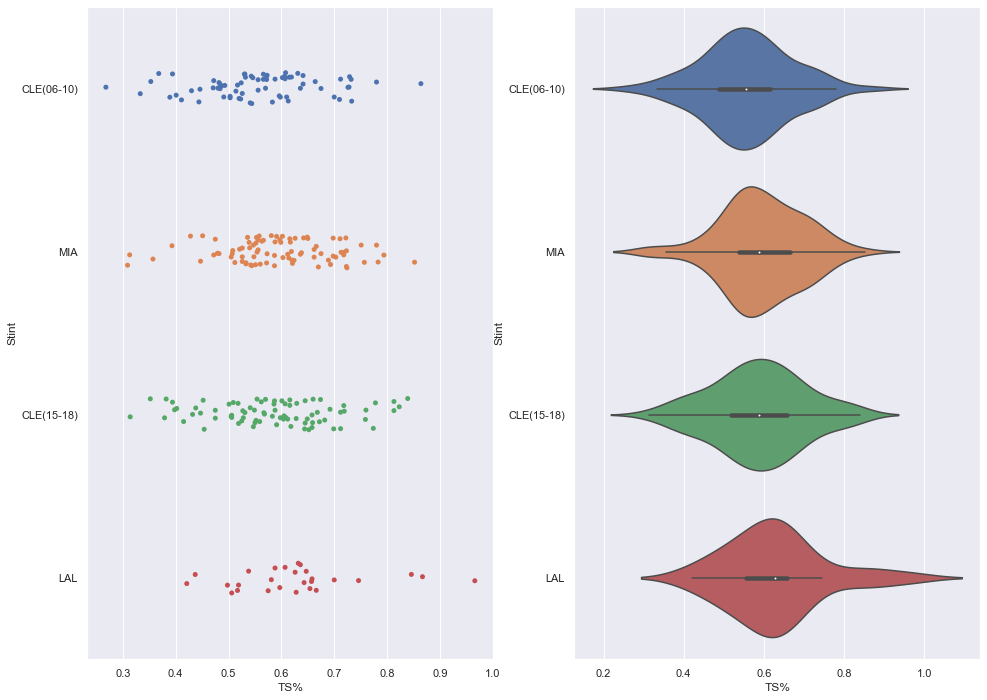

In [230]:
#True shooting % (measures player's shooting efficiency)
bystint("TS%")

Increasing trend in true shooting percentage. LeBron's shooting was the most efficient on the lakers and least efficient during his first stint in cleveland.

Wins
count    174.000000
mean       0.608701
std        0.104992
min        0.314000
25%        0.541250
50%        0.607000
75%        0.669500
max        0.966000
Name: TS%, dtype: float64
Losses
count    92.000000
mean      0.541000
std       0.113479
min       0.268000
25%       0.479500
50%       0.541500
75%       0.607500
max       0.846000
Name: TS%, dtype: float64


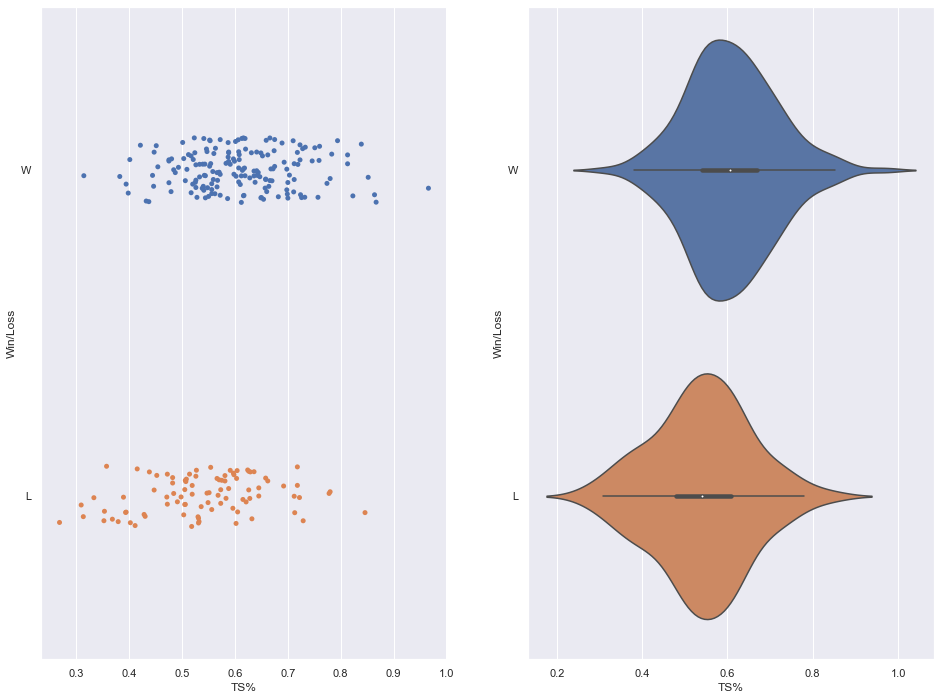

In [231]:
bywl("TS%")

Average TS% is higher by 6% in wins compared to losses.

Overall
count    266.000000
mean       8.988722
std        3.234814
min        1.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       19.000000
Name: TRB, dtype: float64
CLE(06-10)
count    71.000000
mean      8.422535
std       3.106040
min       1.000000
25%       6.000000
50%       8.000000
75%      10.000000
max      19.000000
Name: TRB, dtype: float64
MIA
count    87.000000
mean      8.436782
std       3.186823
min       2.000000
25%       6.000000
50%       8.000000
75%      10.000000
max      18.000000
Name: TRB, dtype: float64
CLE(15-18)
count    81.000000
mean      9.753086
std       3.148535
min       4.000000
25%       8.000000
50%      10.000000
75%      12.000000
max      18.000000
Name: TRB, dtype: float64
LAL
count    27.000000
mean      9.962963
std       3.447200
min       4.000000
25%       7.000000
50%      10.000000
75%      12.000000
max      17.000000
Name: TRB, dtype: float64


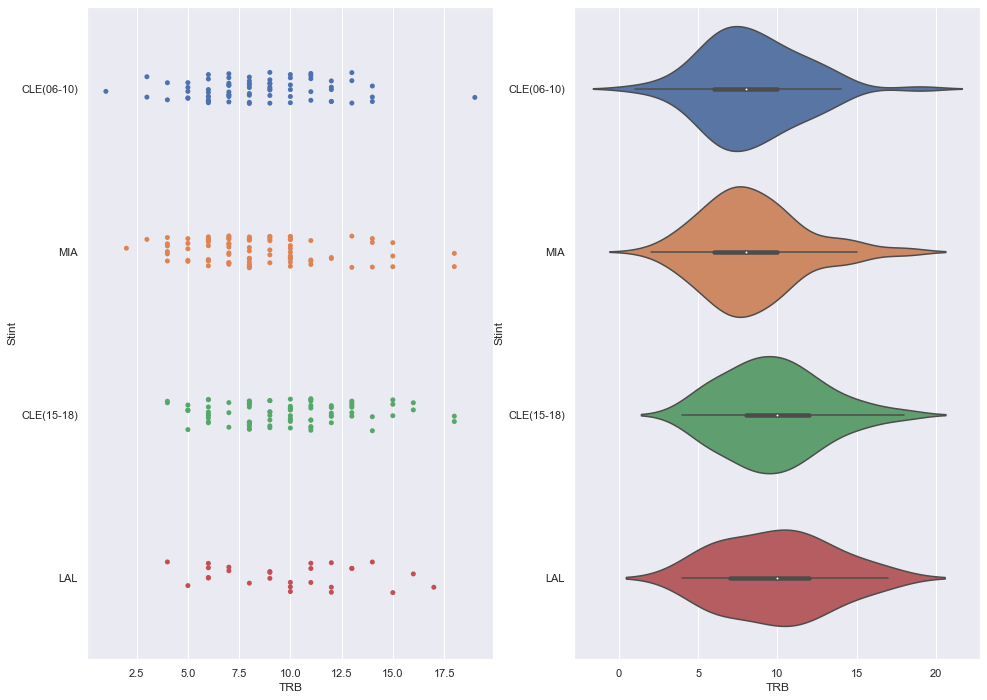

In [232]:
#Rebounds
bystint("TRB")

His rebounds in the playoffs took a significant jump when he returned to the cavaliers. Average rebounds per game was around 8.4 in CLE(06-10) and MIA and above 9.7 in CLE(15-18) and LAL.

Wins
count    174.000000
mean       9.068966
std        3.201492
min        1.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       18.000000
Name: TRB, dtype: float64
Losses
count    92.000000
mean      8.836957
std       3.309252
min       2.000000
25%       7.000000
50%       8.000000
75%      10.000000
max      19.000000
Name: TRB, dtype: float64


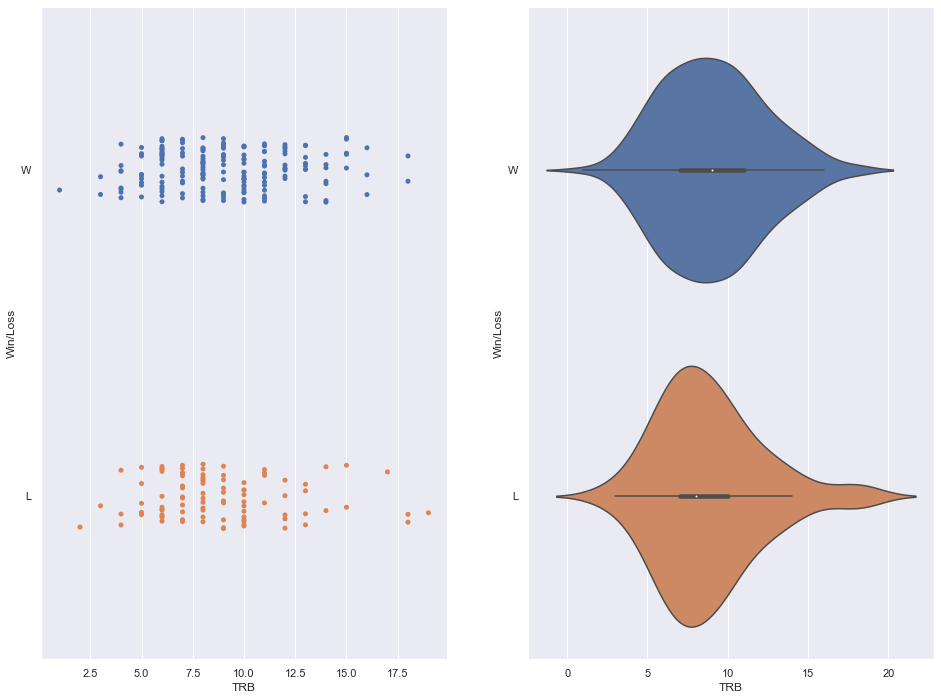

In [233]:
bywl("TRB")

The difference in rebounding in wins and losses is insignificant.

Overall
count    266.000000
mean       7.214286
std        2.777800
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       16.000000
Name: AST, dtype: float64
CLE(06-10)
count    71.000000
mean      7.323944
std       2.545442
min       2.000000
25%       6.000000
50%       7.000000
75%       9.000000
max      13.000000
Name: AST, dtype: float64
MIA
count    87.000000
mean      5.735632
std       2.451671
min       1.000000
25%       4.000000
50%       5.000000
75%       7.000000
max      13.000000
Name: AST, dtype: float64
CLE(15-18)
count    81.000000
mean      8.246914
std       2.750140
min       3.000000
25%       6.000000
50%       8.000000
75%      11.000000
max      14.000000
Name: AST, dtype: float64
LAL
count    27.000000
mean      8.592593
std       2.324771
min       4.000000
25%       7.000000
50%       9.000000
75%      10.000000
max      16.000000
Name: AST, dtype: float64


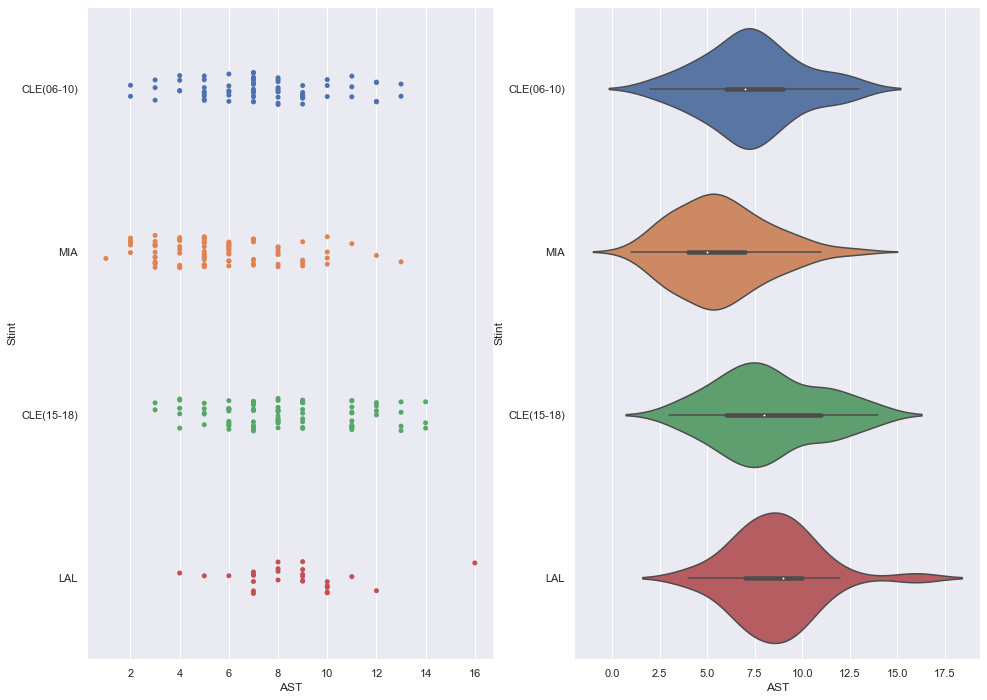

In [234]:
#Assists
bystint("AST")

Assists was much lower in miami with an average around 5.7 as compared to 7-8 in the other stints.

Wins
count    174.000000
mean       7.321839
std        2.730662
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       14.000000
Name: AST, dtype: float64
Losses
count    92.000000
mean      7.010870
std       2.868911
min       2.000000
25%       5.000000
50%       7.000000
75%       9.000000
max      16.000000
Name: AST, dtype: float64


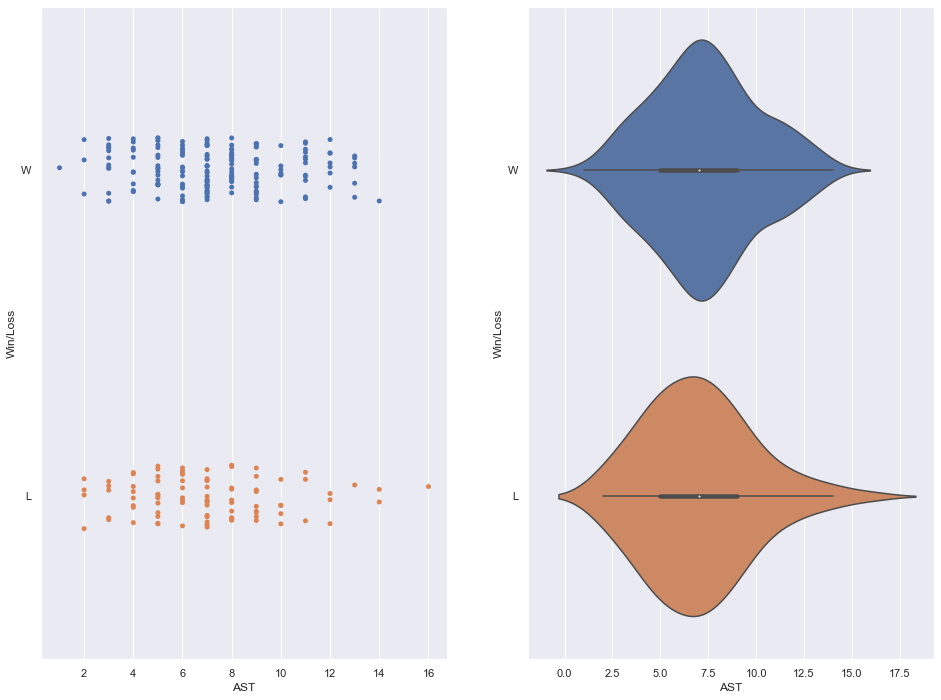

In [235]:
bywl("AST")

Insignificant difference in assists in wins and losses.

Overall
count    266.000000
mean      23.509774
std        8.268192
min       -0.700000
25%       18.125000
50%       23.350000
75%       28.975000
max       44.700000
Name: GmSc, dtype: float64
CLE(06-10)
count    71.000000
mean     23.042254
std       9.488243
min      -0.700000
25%      16.150000
50%      22.800000
75%      29.050000
max      44.700000
Name: GmSc, dtype: float64
MIA
count    87.000000
mean     22.112644
std       6.710020
min      -0.100000
25%      17.950000
50%      22.400000
75%      26.050000
max      39.800000
Name: GmSc, dtype: float64
CLE(15-18)
count    81.000000
mean     25.381481
std       8.567600
min       3.600000
25%      20.200000
50%      24.800000
75%      31.200000
max      42.500000
Name: GmSc, dtype: float64
LAL
count    27.000000
mean     23.625926
std       7.845753
min       6.200000
25%      17.150000
50%      23.400000
75%      29.700000
max      39.100000
Name: GmSc, dtype: float64


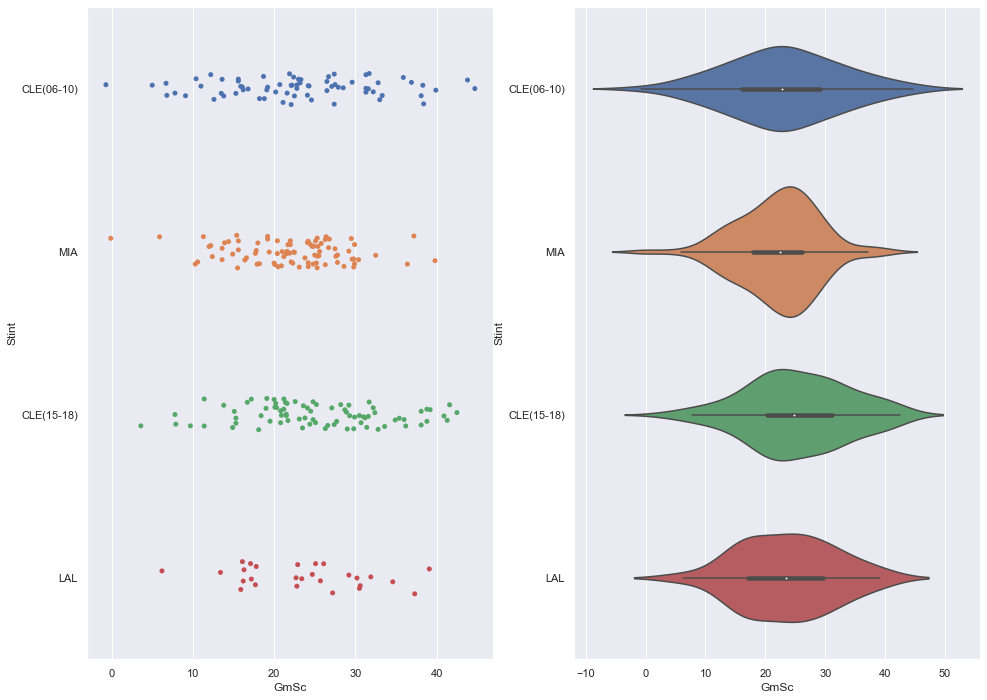

In [236]:
#Gamescore (measure of player's performance in game)
bystint("GmSc")

Gamescores on average were the lowest in miami and highest in cleveland(2015-18). Similar to his scoring output, his gamescores are more consistent on the heat and lakers with a narrower spread.

Wins
count    174.000000
mean      25.548276
std        7.236969
min        6.200000
25%       21.025000
50%       24.850000
75%       29.800000
max       43.800000
Name: GmSc, dtype: float64
Losses
count    92.000000
mean     19.654348
std       8.748606
min      -0.700000
25%      13.750000
50%      19.700000
75%      25.100000
max      44.700000
Name: GmSc, dtype: float64


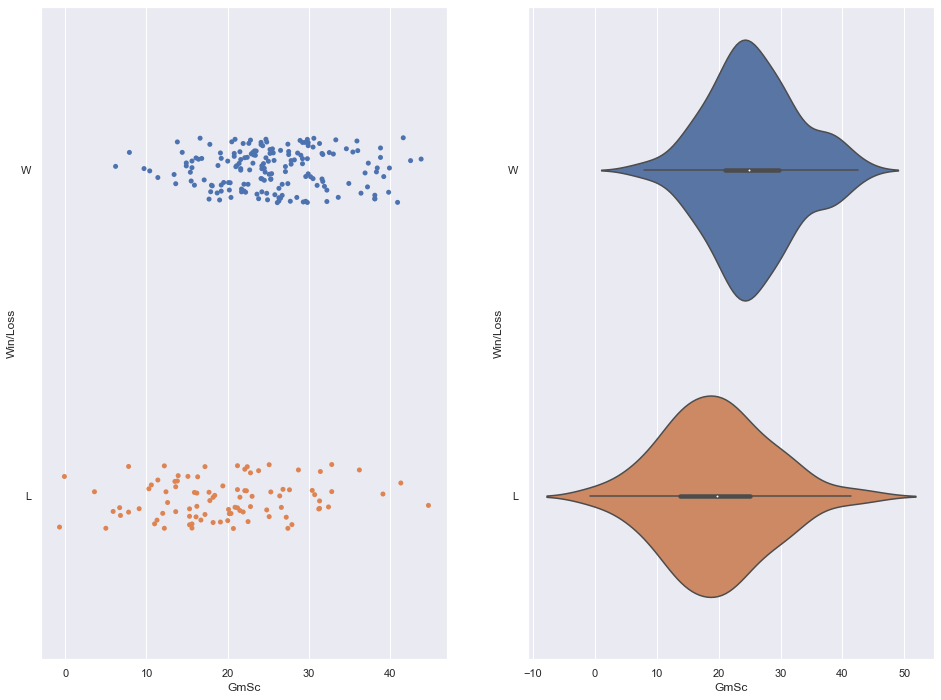

In [237]:
bywl("GmSc")

Gamescores are around 25% higher in wins than losses on average.

Overall
count    266.000000
mean       4.932331
std       14.000375
min      -32.000000
25%       -4.000000
50%        6.000000
75%       14.000000
max       46.000000
Name: +/-, dtype: float64
CLE(06-10)
count    71.000000
mean      3.577465
std      13.711999
min     -31.000000
25%      -5.000000
50%       3.000000
75%      11.500000
max      34.000000
Name: +/-, dtype: float64
MIA
count    87.000000
mean      4.873563
std      13.655057
min     -32.000000
25%      -3.500000
50%       6.000000
75%      13.500000
max      35.000000
Name: +/-, dtype: float64
CLE(15-18)
count    81.000000
mean      5.666667
std      15.493547
min     -32.000000
25%      -3.000000
50%       5.000000
75%      17.000000
max      46.000000
Name: +/-, dtype: float64
LAL
count    27.000000
mean      6.481481
std      11.270692
min     -24.000000
25%       0.000000
50%       8.000000
75%      15.000000
max      23.000000
Name: +/-, dtype: float64


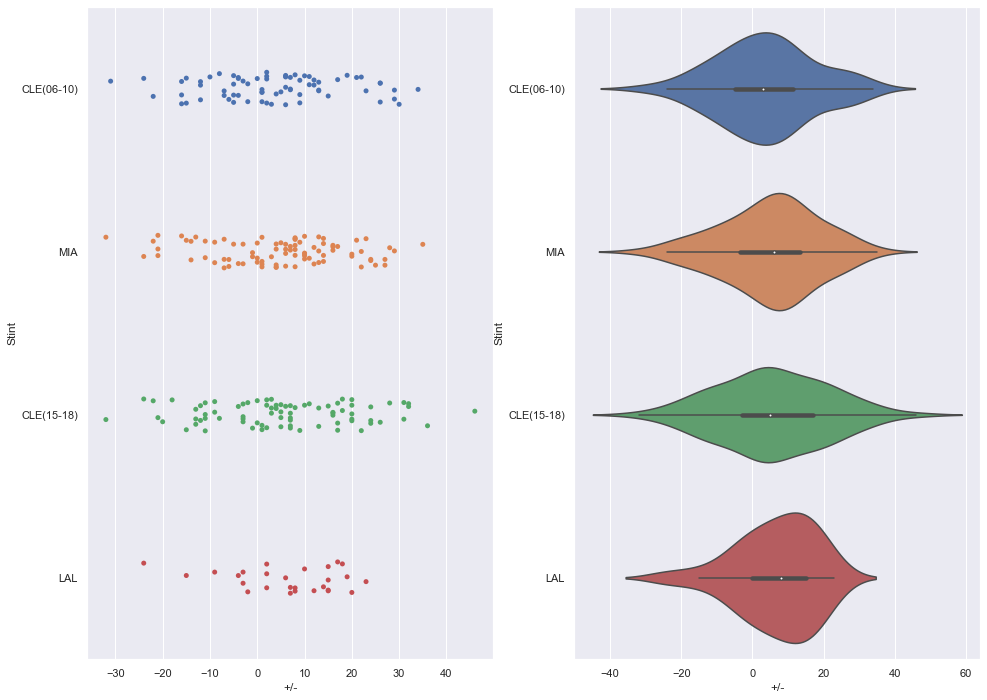

In [238]:
#Plus/minus (net change in score when player is in the game)
bystint("+/-")

Wins
count    174.000000
mean      12.402299
std        9.720915
min       -9.000000
25%        6.000000
50%       11.000000
75%       19.000000
max       46.000000
Name: +/-, dtype: float64
Losses
count    92.000000
mean     -9.195652
std       9.092007
min     -32.000000
25%     -15.000000
50%      -9.000000
75%      -3.000000
max       7.000000
Name: +/-, dtype: float64


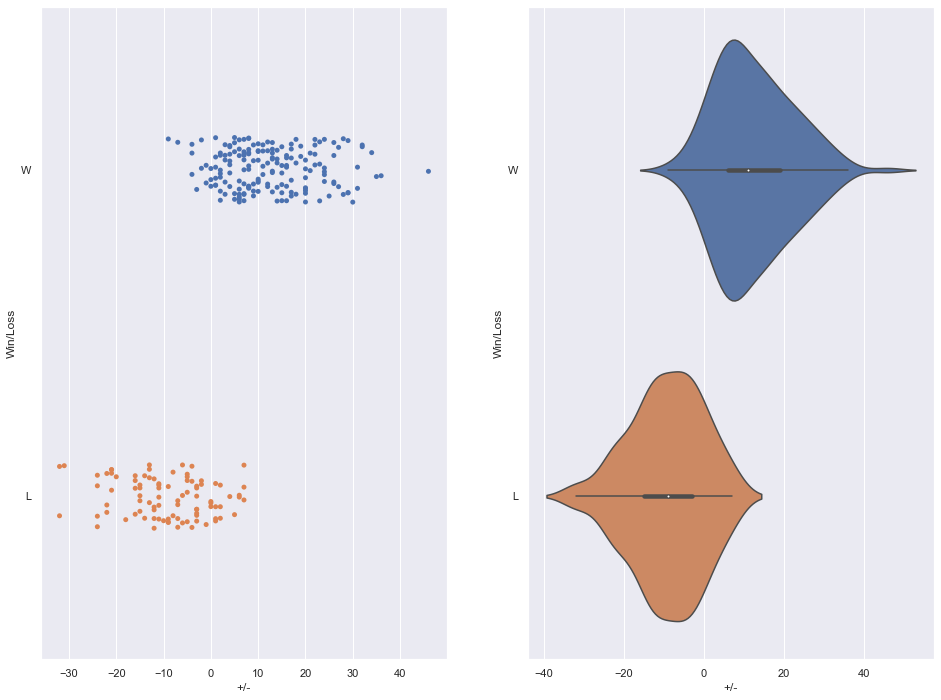

In [239]:
bywl("+/-")

Plus/minus is an extremely good indicator of whether the game is a win or loss.

Overall
count    266.000000
mean      41.486090
std        4.690749
min       24.350000
25%       39.029167
50%       41.900000
75%       44.804167
max       53.000000
Name: MP(dec), dtype: float64
CLE(06-10)
count    71.000000
mean     43.507277
std       3.842061
min      31.166667
25%      41.325000
50%      44.133333
75%      46.150000
max      53.000000
Name: MP(dec), dtype: float64
MIA
count    87.000000
mean     41.708429
std       4.393393
min      24.350000
25%      39.708333
50%      42.716667
75%      44.425000
max      50.283333
Name: MP(dec), dtype: float64
CLE(15-18)
count    81.000000
mean     41.140123
std       4.665945
min      28.133333
25%      38.966667
50%      41.450000
75%      44.766667
max      50.333333
Name: MP(dec), dtype: float64
LAL
count    27.000000
mean     36.492593
std       4.012436
min      26.683333
25%      34.175000
50%      37.516667
75%      39.183333
max      41.850000
Name: MP(dec), dtype: float64


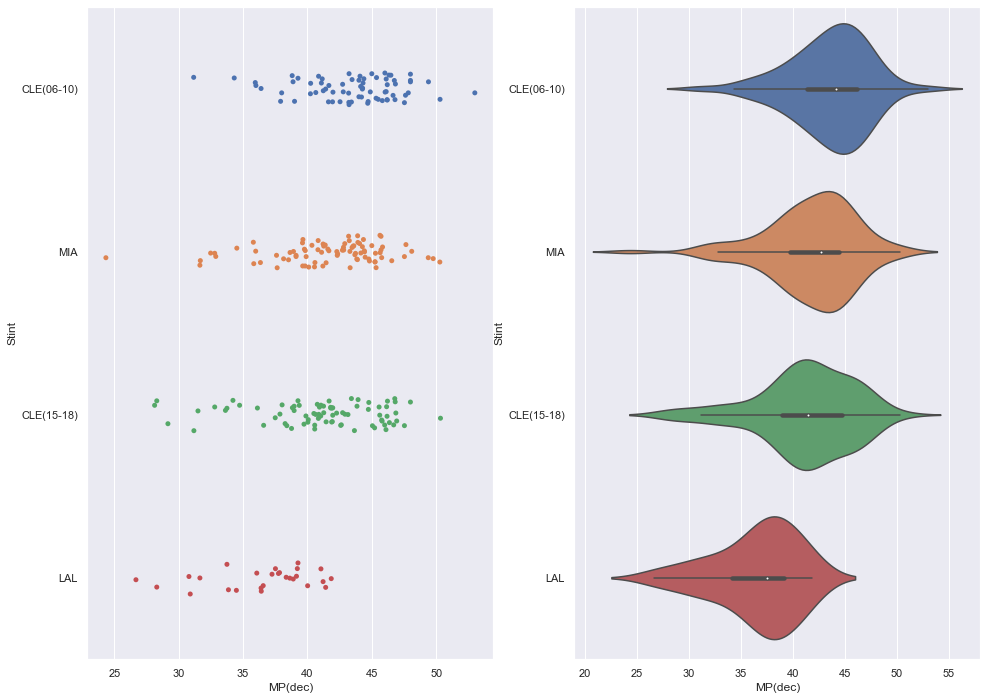

In [240]:
#Minutes played
for i in df.index:
    m = float(((df.loc[i,"MP"]).split(":"))[0])
    s = float(((df.loc[i,"MP"]).split(":"))[1])
    m_dec = m + s/60
    df.loc[i,"MP(dec)"] = m_dec

bystint("MP(dec)")

Lebron's minutes played per game has decreased steadily over his playoff career from around 43 min in cleveland(06-10) to 36 min in la.

Wins
count    174.000000
mean      41.243199
std        4.932198
min       26.683333
25%       38.708333
50%       41.733333
75%       44.670833
max       53.000000
Name: MP(dec), dtype: float64
Losses
count    92.000000
mean     41.945471
std       4.183499
min      24.350000
25%      39.775000
50%      42.133333
75%      45.108333
max      49.400000
Name: MP(dec), dtype: float64


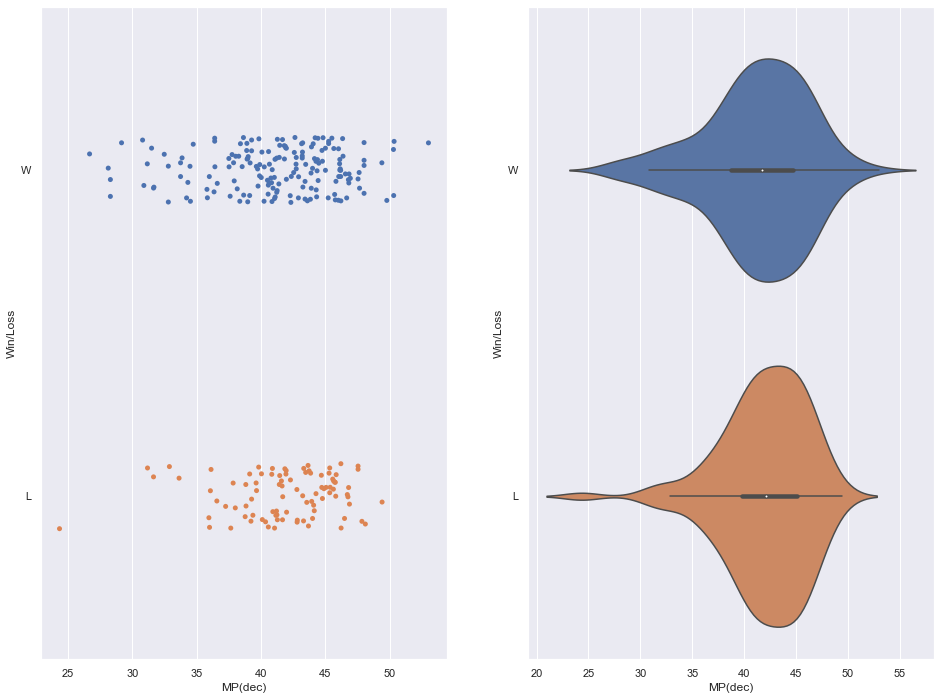

In [241]:
bywl("MP(dec)")

No observable difference in minutes played in wins and losses.

Overall
count    266.000000
mean      32.301880
std        5.667754
min       17.900000
25%       29.025000
50%       31.950000
75%       35.575000
max       49.100000
Name: USG%, dtype: float64
CLE(06-10)
count    71.000000
mean     33.087324
std       5.695811
min      17.900000
25%      29.600000
50%      33.200000
75%      37.600000
max      42.800000
Name: USG%, dtype: float64
MIA
count    87.000000
mean     30.552874
std       5.035429
min      17.900000
25%      27.750000
50%      30.800000
75%      33.250000
max      49.100000
Name: USG%, dtype: float64
CLE(15-18)
count    81.000000
mean     34.075309
std       5.907824
min      21.200000
25%      30.000000
50%      33.600000
75%      38.000000
max      47.600000
Name: USG%, dtype: float64
LAL
count    27.000000
mean     30.551852
std       4.889578
min      21.400000
25%      26.650000
50%      29.800000
75%      33.850000
max      40.900000
Name: USG%, dtype: float64


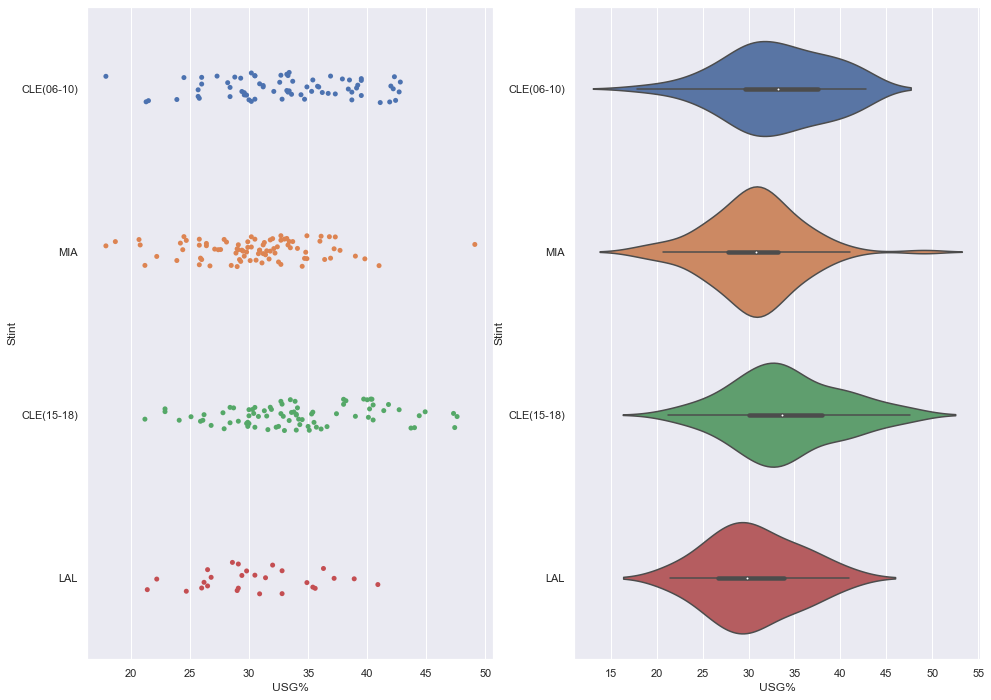

In [242]:
#Usage rate (Estimated percentage of team plays used by a player while he was on the floor)
bystint("USG%")

Usage rate was highest on CLE(2015-18) followed by CLE(2006-10) and was similar on the heat and lakers at around 30% on average. 

Wins
count    174.000000
mean      32.309195
std        5.568608
min       18.700000
25%       29.100000
50%       32.100000
75%       35.475000
max       49.100000
Name: USG%, dtype: float64
Losses
count    92.000000
mean     32.288043
std       5.881669
min      17.900000
25%      28.625000
50%      31.200000
75%      36.125000
max      47.600000
Name: USG%, dtype: float64


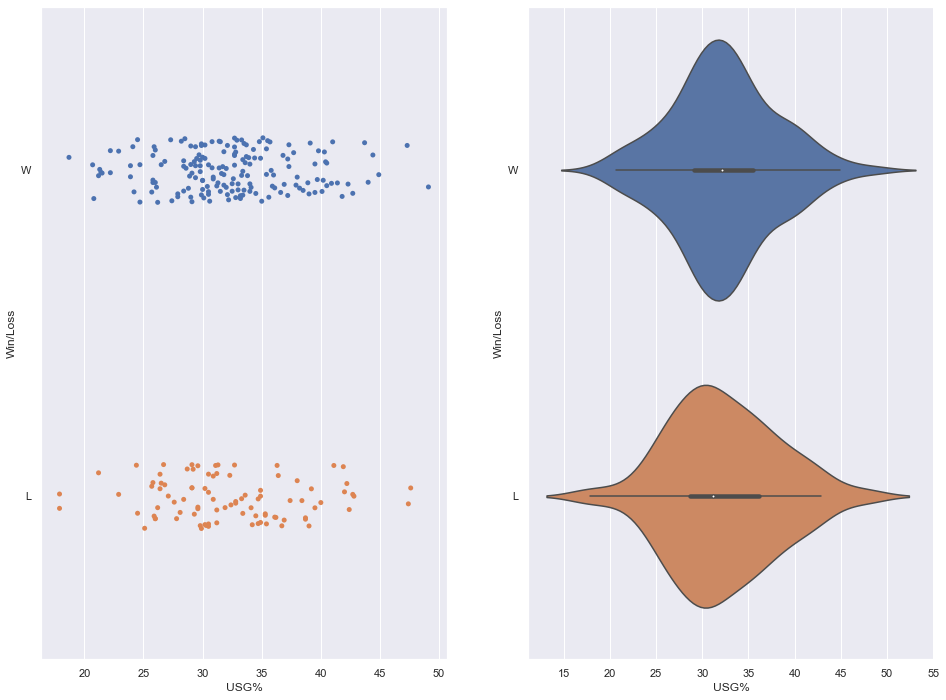

In [243]:
bywl("USG%")

No observable difference in usage rate in wins and losses.

Overall
count    266.000000
mean     117.172932
std       21.094401
min       54.000000
25%      104.000000
50%      117.000000
75%      131.750000
max      182.000000
Name: ORtg, dtype: float64
CLE(06-10)
count     71.000000
mean     114.591549
std       24.107840
min       54.000000
25%      101.000000
50%      115.000000
75%      128.500000
max      169.000000
Name: ORtg, dtype: float64
MIA
count     87.000000
mean     117.528736
std       17.926750
min       74.000000
25%      107.000000
50%      118.000000
75%      130.000000
max      155.000000
Name: ORtg, dtype: float64
CLE(15-18)
count     81.000000
mean     117.790123
std       21.008163
min       71.000000
25%      104.000000
50%      117.000000
75%      135.000000
max      165.000000
Name: ORtg, dtype: float64
LAL
count     27.000000
mean     120.962963
std       22.691038
min       78.000000
25%      105.000000
50%      118.000000
75%      137.500000
max      182.000000
Name: ORtg, dtype: float64


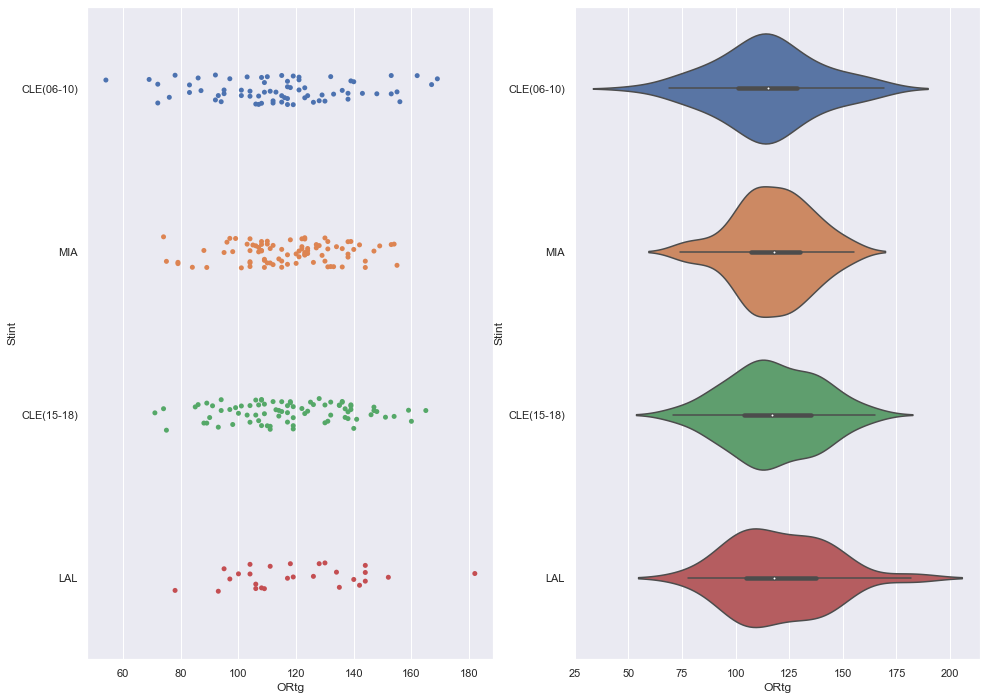

In [244]:
#Offensive Rating (Estimated points produced per 100 possessions)
bystint("ORtg")

His offensive rating has increased steadily over his playoff career from an average of 114.6 in cleveland(2006-10) to 121 on the lakers.

Wins
count    174.000000
mean     123.798851
std       18.750870
min       75.000000
25%      110.000000
50%      123.000000
75%      137.750000
max      182.000000
Name: ORtg, dtype: float64
Losses
count     92.000000
mean     104.641304
std       19.613060
min       54.000000
25%       92.000000
50%      106.000000
75%      117.000000
max      165.000000
Name: ORtg, dtype: float64


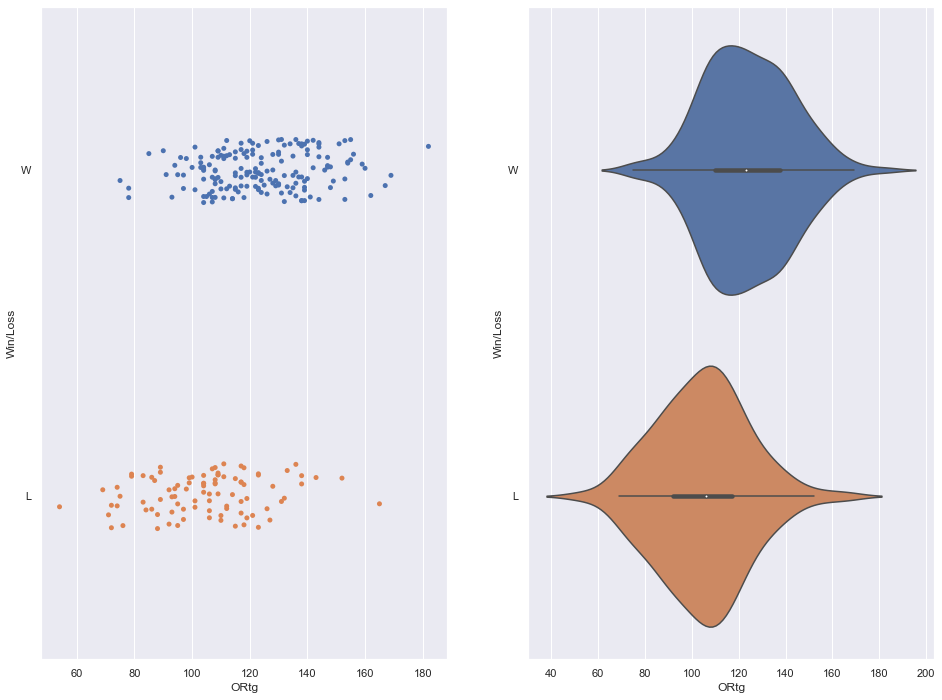

In [245]:
bywl("ORtg")

Offensive rating is a great indictor of whether the game is a win or loss

Overall
count    266.000000
mean     103.733083
std       11.933155
min       73.000000
25%       95.000000
50%      104.000000
75%      112.000000
max      141.000000
Name: DRtg, dtype: float64
CLE(06-10)
count     71.000000
mean     101.535211
std       12.934816
min       73.000000
25%       92.000000
50%      101.000000
75%      110.500000
max      141.000000
Name: DRtg, dtype: float64
MIA
count     87.000000
mean     103.114943
std       11.511799
min       73.000000
25%       96.500000
50%      103.000000
75%      110.000000
max      131.000000
Name: DRtg, dtype: float64
CLE(15-18)
count     81.000000
mean     104.876543
std       11.784930
min       77.000000
25%       97.000000
50%      106.000000
75%      114.000000
max      130.000000
Name: DRtg, dtype: float64
LAL
count     27.000000
mean     108.074074
std        9.856376
min       87.000000
25%      101.000000
50%      106.000000
75%      116.500000
max      124.000000
Name: DRtg, dtype: float64


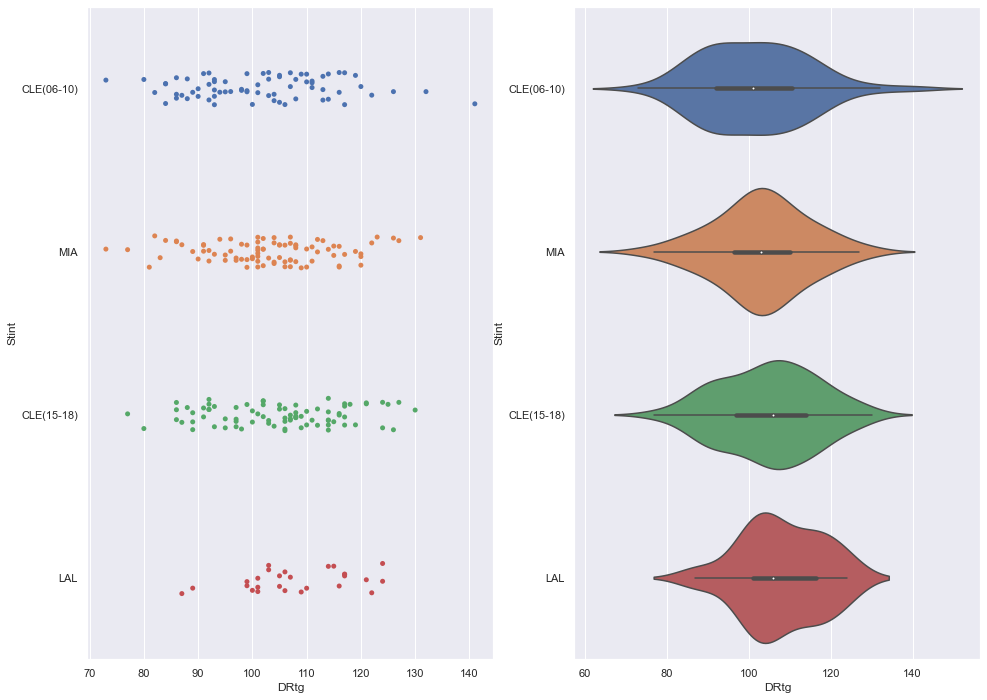

In [246]:
#Defensive Rating (Estimated points allowed per 100 possessions)
bystint("DRtg")

In contrast to his offensive rating, his defensive rating has worsened steadily in his playoff career from an average of 101.5 in his first stint in cleveland to 108.1 on the lakers.

Wins
count    174.000000
mean      99.793103
std       10.519608
min       73.000000
25%       92.000000
50%      101.000000
75%      107.000000
max      126.000000
Name: DRtg, dtype: float64
Losses
count     92.000000
mean     111.184783
std       10.884942
min       82.000000
25%      103.750000
50%      113.000000
75%      117.000000
max      141.000000
Name: DRtg, dtype: float64


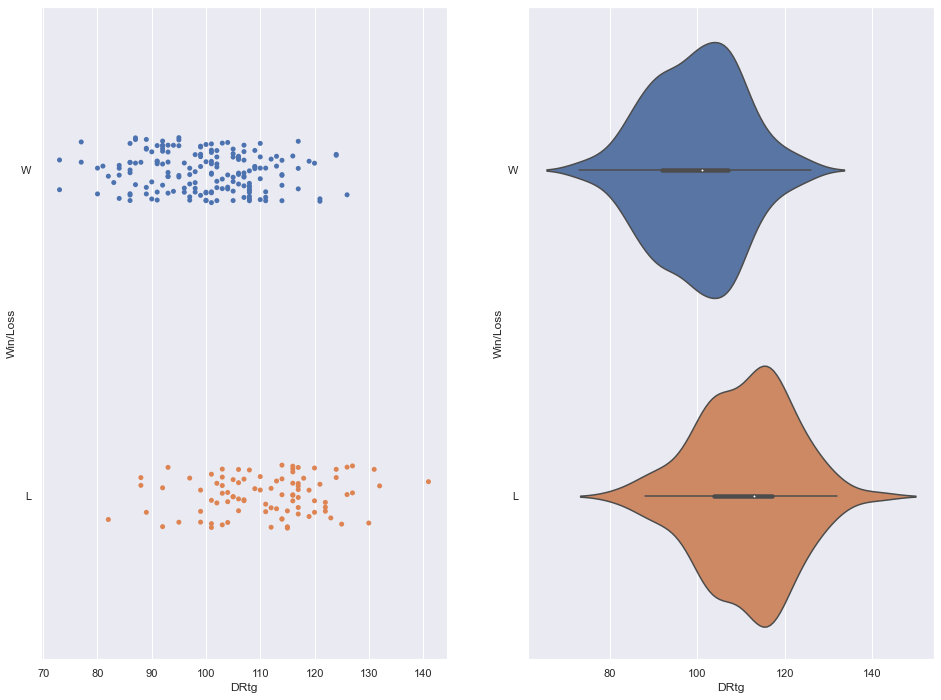

In [247]:
bywl("DRtg")

Defensive rating is also a good indicator of the outcome of the game, but less so than offensive rating.

In [250]:
df.to_csv("LBJPO(updated).csv",index=False)